In [1]:
#Import Dependencies
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline


#Clean data and reducing the columns
heart_disease_df = pd.read_csv('heart_2020_cleaned.csv')
heart_disease_df = heart_disease_df.drop(columns=['Stroke','PhysicalHealth','MentalHealth','DiffWalking','Race','Diabetic','GenHealth','Asthma','KidneyDisease','SkinCancer'])

reduced_df = heart_disease_df[['HeartDisease','BMI','Smoking','AlcoholDrinking','Sex','AgeCategory','PhysicalActivity','SleepTime']]
reduced_df

#Renaming the columns
renamed_df = heart_disease_df.rename(columns={'HeartDisease':'Heart Disease', 'AlcoholDrinking':'Alcohol Drinking', 'AgeCategory':'Age Category', 'PhysicalActivity':'Physical Activity', 'SleepTime':'Sleep Time'})
renamed_df

,Heart Disease,BMI,Smoking,Alcohol Drinking,Sex,Age Category,Physical Activity,Sleep Time
0,No,16.60,Yes,No,Female,55-59,Yes,5.0
1,No,20.34,No,No,Female,80 or older,Yes,7.0
2,No,26.58,Yes,No,Male,65-69,Yes,8.0
3,No,24.21,No,No,Female,75-79,No,6.0
4,No,23.71,No,No,Female,40-44,Yes,8.0
...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,Male,60-64,No,6.0
319791,No,29.84,Yes,No,Male,35-39,Yes,5.0
319792,No,24.24,No,No,Female,45-49,Yes,6.0
319793,No,32.81,No,No,Female,25-29,No,12.0


In [2]:

# Find the maximum and minimum age
print(renamed_df["Age Category"].max())
print(renamed_df["Age Category"].min())

80 or older
18-24


In [3]:
# Slice the data, place it in bins, and create a new column to contain the data series
df_ages = pd.DataFrame({'Age Category': []})
df_ages['age_by_decade']= pd.cut(x=df_ages['Age Category'], bins=[18,24,29,34,39,44,49,54,59,64,69,74,79,80])

renamed_df.head()

# Count how many values are in each Age category
Age_group = renamed_df.groupby('Age Category')['Age Category'].count()
Age_group

Age Category
18-24          21064
25-29          16955
30-34          18753
35-39          20550
40-44          21006
45-49          21791
50-54          25382
55-59          29757
60-64          33686
65-69          34151
70-74          31065
75-79          21482
80 or older    24153
Name: Age Category, dtype: int64

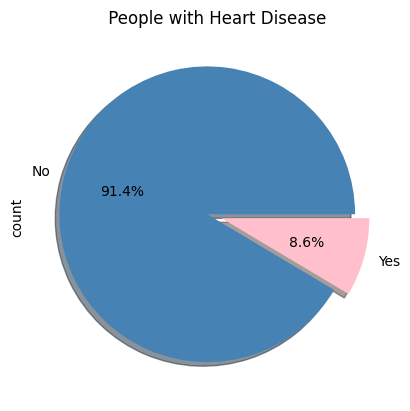

In [4]:
#Creating a pie chart to determine the percentage of people with heart disease.
heart_data= renamed_df["Heart Disease"].value_counts()
plt.title(" People with Heart Disease")

#Defining colors for the pie chart
colors = ['steelblue','pink']

#Defining the ratio of gap between each segment
explode=(0.05,0.05)

heart_data.plot.pie(autopct= "%1.1f%%", colors=colors,explode= explode, shadow = True)
plt.savefig('heart_data.png')
plt.show()

In [5]:
#Number of people consuming alcohol
alcohol_group=renamed_df.groupby('Alcohol Drinking')['Alcohol Drinking'].count()
alcohol_group

Alcohol Drinking
No     298018
Yes     21777
Name: Alcohol Drinking, dtype: int64

In [6]:
#Creating a dataframe with just the heart disease and alcohol column
heart_alcohol_df = renamed_df[['Heart Disease','Alcohol Drinking']]
heart_alcohol_df

#Finding the number of people with heart disease and yes for alcohol consumption
heart_alcohol_df[(heart_alcohol_df['Heart Disease'] == 'Yes') & (heart_alcohol_df['Alcohol Drinking'] == 'Yes')].value_counts()


Heart Disease  Alcohol Drinking
Yes            Yes                 1141
Name: count, dtype: int64

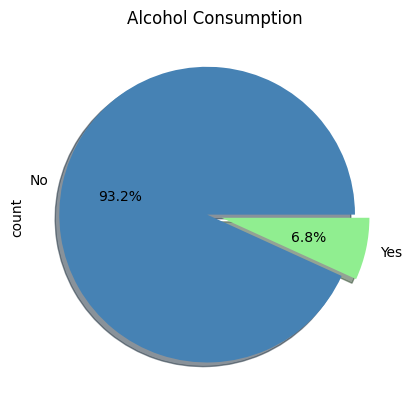

In [7]:
#Creating a pie chart for alcohol drinking.
alcohol_data= renamed_df["Alcohol Drinking"].value_counts()
plt.title("Alcohol Consumption")

#Defining colors for the pie chart
colors = ['steelblue','lightgreen']

#Defining the ratioof gap between each segment
explode=(0.05,0.05)

alcohol_data.plot.pie(autopct= "%1.1f%%", colors=colors,explode= explode, shadow = True)
plt.savefig('alcohol_data.png')
plt.show()

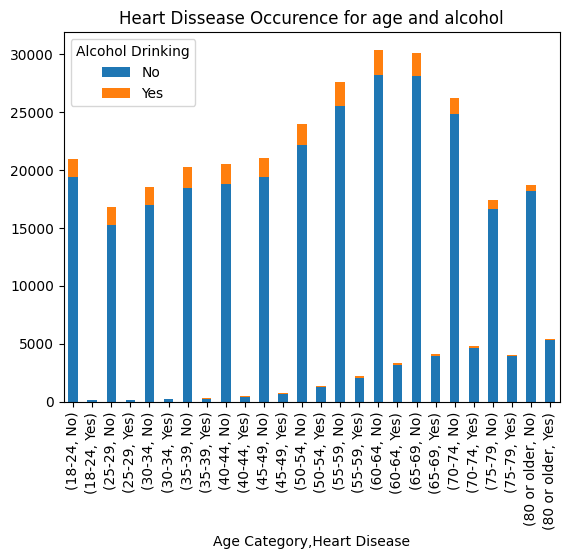

In [8]:
#creating a stacked bar graph to visualize number of people with heart disease in different age categories and also number of people drinking alcohol.
age_groups_disease = renamed_df.groupby(['Age Category', 'Heart Disease','Alcohol Drinking']).size().unstack()
age_groups_disease.plot(kind = 'bar', stacked =True)

#Give the chart a title and saving the graph as png
plt.title('Heart Dissease Occurence for age and alcohol')
plt.savefig('age_groups_disease.png')
plt.show()